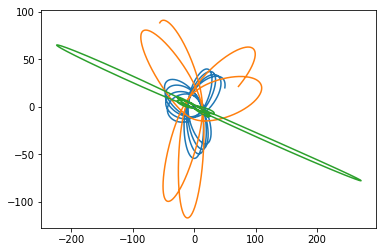

In [12]:
%matplotlib inline

import numpy
import numpy.linalg
import matplotlib.pyplot as plt

G = 50.0  
collision_distance = 3.0  
model_delta_t = 0.01
time_to_model = 10

class MaterialPoint:
    
    
    def __init__(self, mass: 'float', position: 'numpy.array', velocity: 'numpy.array'):
        
        self.mass = mass
        self.position = position
        self.velocity = velocity
    
    @staticmethod
    def gravity_dencity(dist: 'float')-> 'float':
        if dist > collision_distance:
            return G / dist 
        else:
            return -G / dist **2 
    
    def force_induced_by_other(self, other: 'MaterialPoint')-> 'numpy.array':
        if self == other:
            return numpy.array([0,0])
        delta_p = other.position - self.position
        distance = numpy.linalg.norm(delta_p)  
        force_direction = delta_p / distance
        force = force_direction * self.mass * other.mass * MaterialPoint.gravity_dencity(distance)
        return force
    
    def advance(self):
       
        self.position += self.velocity * model_delta_t

    def apply_force(self, force: 'numpy.array'):
       
        self.velocity += force * model_delta_t / self.mass


centrum = MaterialPoint(500.0, numpy.array([0.0, 0.0]), numpy.array([0.0, 0.0]))
points = [
MaterialPoint(8.0, numpy.array([50.0, 20.0]), numpy.array([20.40, 72.66])),
MaterialPoint(12.0, numpy.array([-56.0, 88.5]), numpy.array([27.0, 34.3])),
MaterialPoint(-2.0, numpy.array([22.0, -10.8]), numpy.array([17.0, 20.0]))
]

def model_step():
    for p1 in points:
        p1.apply_force(p1.force_induced_by_other(centrum))
        for p2 in points:
            p1.apply_force(p1.force_induced_by_other(p2))
    for p in points:
        p.advance()
coordinates: 'list[list[numpy.array]]' = []

for stepn in range(int(time_to_model / model_delta_t)):
    coordinates.append([ 
        p.position.copy() for p in points
    ])
    model_step()
coordinates = list(map(list, zip(*coordinates)))

c = plt.Circle((0, 0), 2, color='b')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.add_patch(c)

for p in coordinates:
    plt.plot(
        *[[v[c] for v in p] for c in [0,1]]
          )

plt.show()